In [1]:
import ROOT
import copy
#from NeuralNetwork import MultiLayerPerceptron as mlp
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

canvas <ROOT.TPad object ("c1_1") at 0x5ee8eb0>


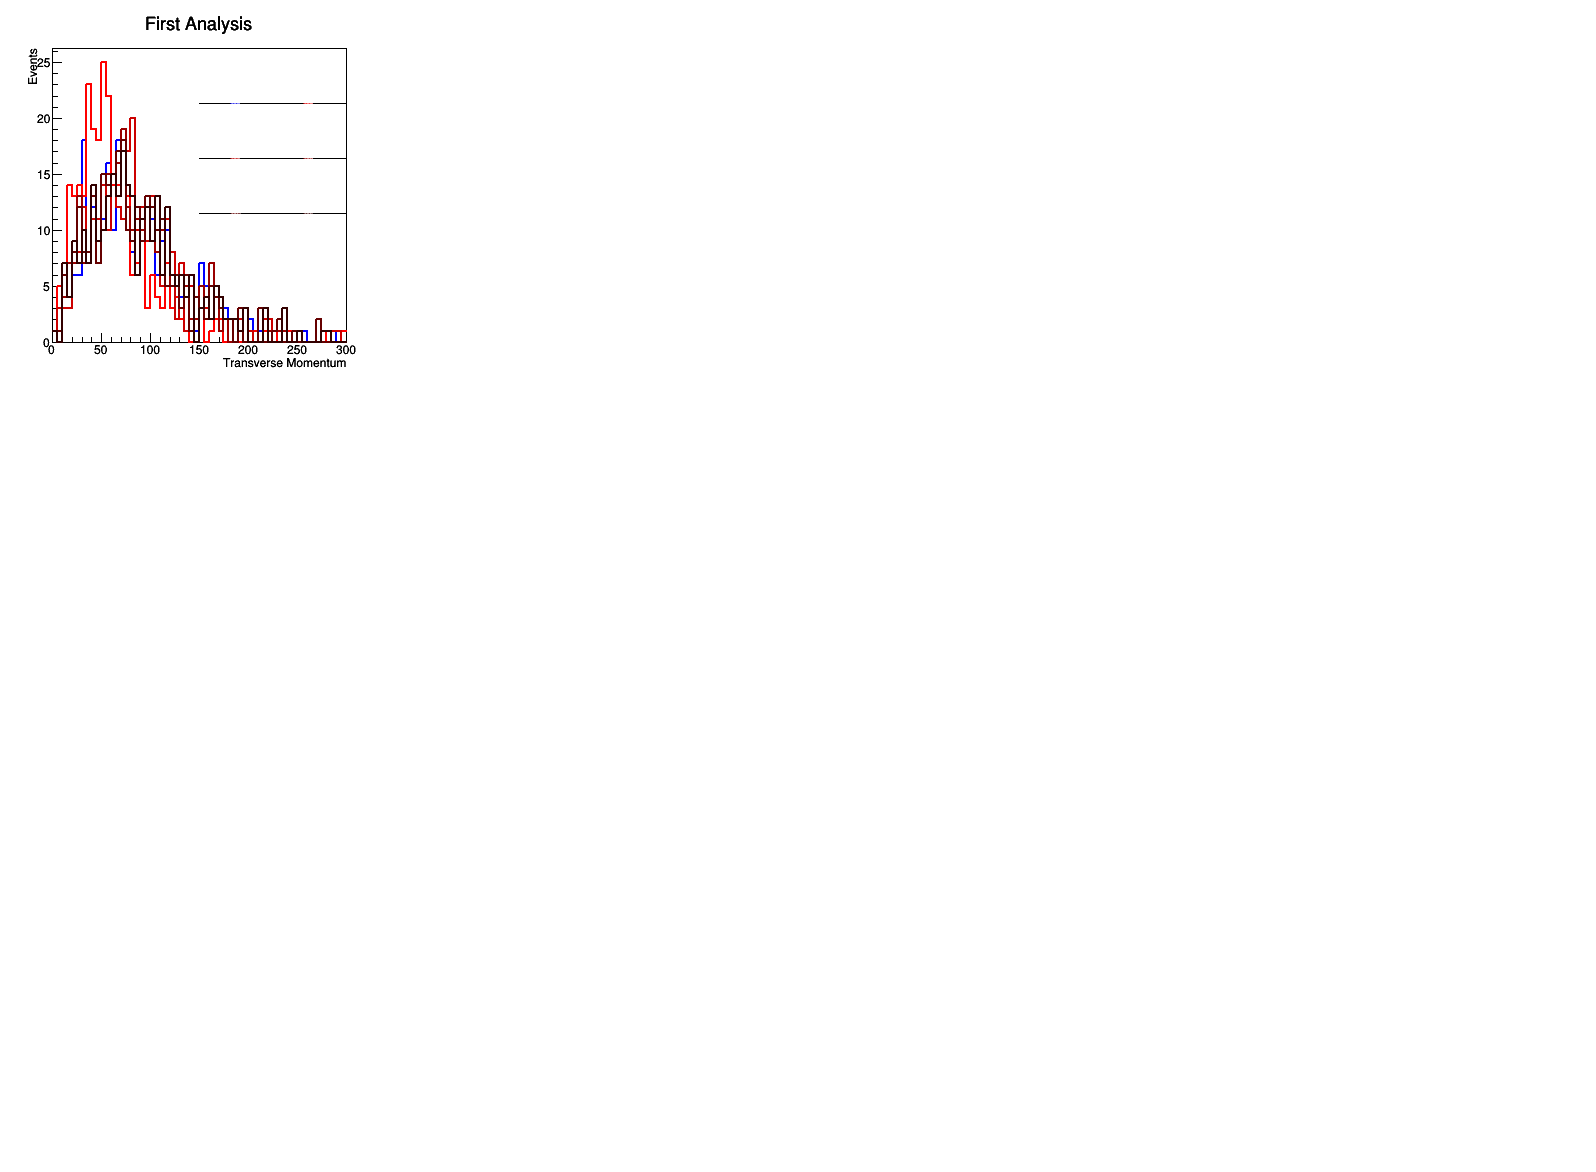

In [2]:

nrEvents = 300

output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results"

data_input = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet/lvbb125.root"
treeName = "perevent"

file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

list_inf = []
list_color = []




#hist_inf = HistogramFunctions.OneDimHistInfo("Relative Pt","h_ptrel",bins,m_min,m_max,"Relative Pt",ylabel)
#list_inf.append(hist_inf)
#list_color.append(ROOT.kRed)

#  Make a list of pt histogram

list_hist_pt = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth","h_pt_truth",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)
list_color.append(ROOT.kBlue)

hist_inf = HistogramFunctions.OneDimHistInfo("EM","h_pt_EM",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)
list_color.append(ROOT.kRed)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJES","h_pt_EMJES",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)
list_color.append(ROOT.kRed+1)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSC","h_pt_EMJESGSC",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)
list_color.append(ROOT.kRed+2)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMu","h_pt_EMJESGSCMu",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)

list_color.append(ROOT.kRed+3)

hist_inf = HistogramFunctions.OneDimHistInfo("EMJESGSCMuPt","h_pt_EMJESGSCMuPt",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_hist_pt.append(hist_inf)
list_color.append(ROOT.kRed+4)


list_hist_test = HistogramFunctions.CreateListOf1DHistograms(list_hist_pt,list_color)
# end

# making list for create an input to a NN
list_val = []
list_ptrel = []
list_pt = []
# end

# simple histogram
#ptRel = ROOT.TH1F("ptRel", "ptRel", 60, 0, 300)

for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            break
    # variables for j1.     
    E1 = tree.j1_GENWZ_E
    Eta1 = tree.j1_GENWZ_Eta
    Phi1 = tree.j1_GENWZ_Phi
    Pt1 = tree.j1_GENWZ_Pt
    
    Theta1 = AuxiliarFunctions.theta(Eta1)
    Comp1 = AuxiliarFunctions.Componets(E1,Eta1,Phi1,Theta1)
    norm1 = AuxiliarFunctions.norm(Comp1)
    
    # variables for j2.     
    E2 = tree.j2_GENWZ_E
    Eta2 = tree.j2_GENWZ_Eta
    Phi2 = tree.j2_GENWZ_Phi
    Pt2 = tree.j2_GENWZ_Pt
    
    Theta2 = AuxiliarFunctions.theta(Eta2)
    Comp2 = AuxiliarFunctions.Componets(E2,Eta2,Phi2,Theta2)
    norm2 = AuxiliarFunctions.norm(Comp2)
    
    # sum of components.
    Comp3 = AuxiliarFunctions.somaComponents(Comp1,Comp2)
    norm3 = AuxiliarFunctions.norm(Comp3)
    numerador1 = AuxiliarFunctions.numerador(Comp1,Comp3)
    
    angle1 = AuxiliarFunctions.alpha(numerador1,norm1,norm3)
    
    #compute Relative Pt
    ptrel_j1 = AuxiliarFunctions.PtRelative(E1,angle1)
    
    #fill list with variables
    list_ptrel.append(round(ptrel_j1,3))
    
    list_hist_test[0].Fill(tree.j1j2_GENWZ_Pt)
    list_hist_test[1].Fill(tree.j1j2_EM_Pt)
    list_hist_test[2].Fill(tree.j1j2_EMJES_Pt)
    list_hist_test[3].Fill(tree.j1j2_EMJESGSC_Pt)
    list_hist_test[4].Fill(tree.j1j2_EMJESGSCMu_Pt)
    list_hist_test[5].Fill(tree.j1j2_EMJESGSCMuPt_Pt)
    
    #Fill simple histogram
    #ptRel.Fill(ptrel_j1)
    
    #fill histograms
    #list_hist_test[0].Fill(Pt1)
    #list_hist_test[1].Fill(tree.j1_EMJESGSCMu_Pt)
    #list_hist_test[2].Fill(tree.j1_EMJESGSC_Pt)
    

list_val.append(list_ptrel)
list_val.append(list_pt)

#HistogramFunctions.Draw1DHists(list_hist_test,output)

#newlist = list_hist_test[:]

#print "Matrix: ", list_val
#print "Result", list_hist_test[0]

clone_list = []
    
for hist in list_hist_test:
    newhist = hist.Clone()
    clone_list.append(newhist)  


# to draw histogram

c1 = rootnotes.canvas("c1", (1600, 1200))
#c1 = ROOT.TCanvas("c_draw_hist","Analysis Canvas", 800,600)

c1.Divide(4,3)
a = c1.cd(1)
b = c1.cd(2)
c = c1.cd(3)
d = c1.cd(4)
HistogramFunctions.DrawList1DHistInCanvas(clone_list, "First Analysis", "Transverse Momentum", "Events", a)
#HistogramFunctions.Draw1DHistInCanvas(list_hist_test,0,a)
#HistogramFunctions.Draw1DHistInCanvas(list_hist_test,1,b)
#HistogramFunctions.Draw1DHistInCanvas(list_hist_test,2,c)

#HistogramFunctions.DrawList1DHistInCanvas(list_hist_test, "First Analysis", "Transverse Momentum", "Events", e)
#test = HistogramFunctions.Legend(list_hist_test[0],a)
#ROOT.SetOwnership(Legend,0)
#test = ROOT.TPaveText(0.6, 0.75, 0.9, 0.9, "NDC")
#test = FigureFunctions.GetHistInfo(list_hist_test[0],test)
#test.AddText("Ola")
#test.SetBorderSize(1)
#test.SetFillColor(ROOT.kNone)
#test.Draw()

#c1.Print('Test.pdf')
c1